In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sys
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [5]:
usa = pd.read_csv('USvideos.csv')

In [6]:
usa.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [7]:
usa.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [8]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [9]:
usa.drop(['video_id','publish_time','video_error_or_removed','ratings_disabled','comments_disabled','tags'], axis=1 ,inplace = True)

In [10]:
f_mostlikes_channel = usa.likes > 5000000
f_mostviews_channel = usa.views > 100000000
f_mostdislike_channel = usa.dislikes > 50000
f_mostcomment_channel = usa.comment_count > 100000
usa[f_mostlikes_channel & f_mostviews_channel & f_mostcomment_channel]

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
37247,18.27.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,103786733,5386959,190567,1189456,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
37453,18.28.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,107756615,5439015,194172,1197130,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
37655,18.29.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,111882133,5486349,197638,1204867,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
37861,18.30.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,115664850,5530568,200995,1213172,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
38072,18.31.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,121219886,5595203,205565,1225326,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
38273,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
38547,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,“This is America” by Childish Gambino http://s...


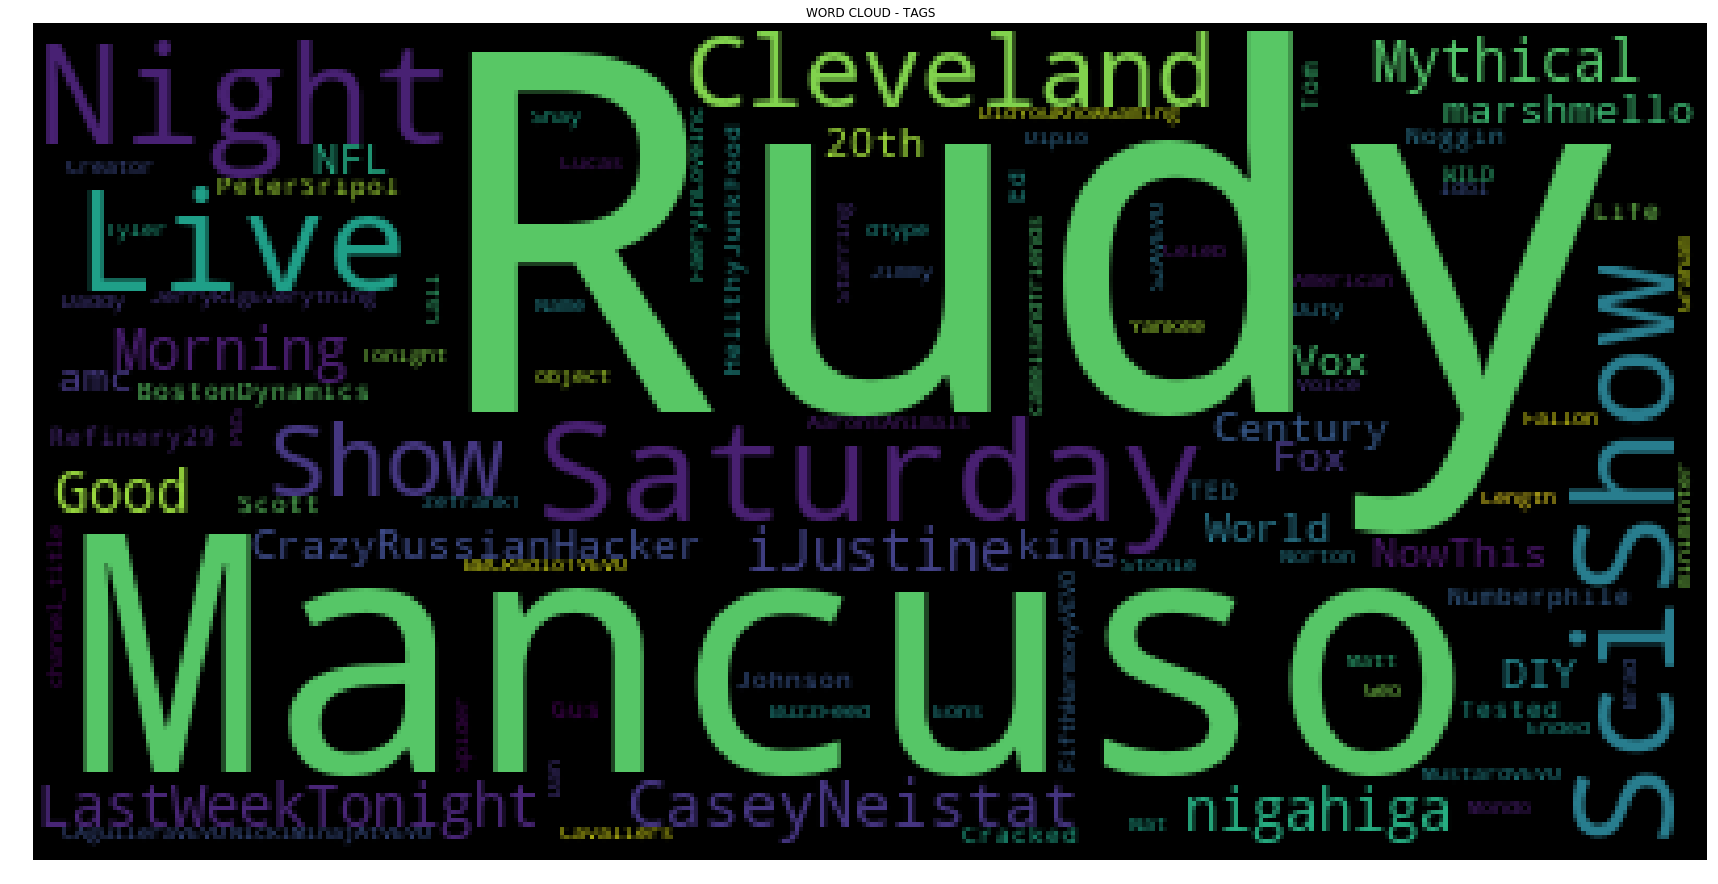

In [19]:
df_youtube = pd.DataFrame(usa)
plt.figure(figsize = (30,30))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['channel_title']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()